In [38]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:xlabel='bmi', ylabel='charges'>

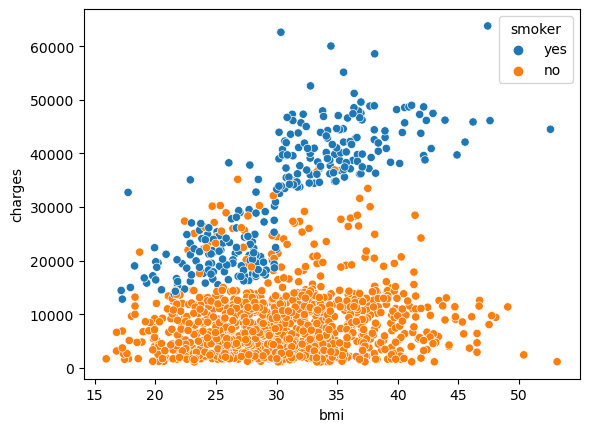

In [17]:
sns.scatterplot(data=df, x="bmi", y="charges", hue='smoker')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

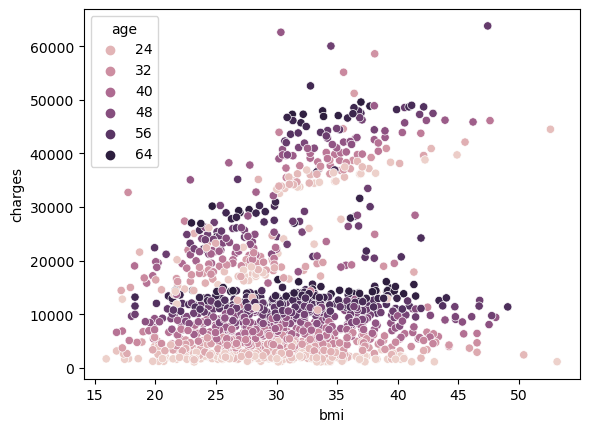

In [18]:
sns.scatterplot(data=df, x="bmi", y="charges", hue='age')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

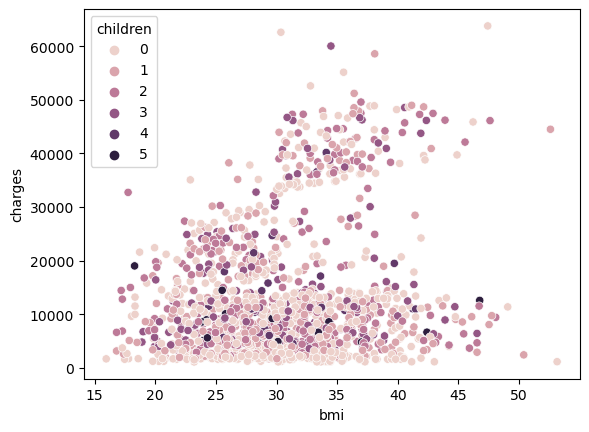

In [21]:
sns.scatterplot(data=df, x="bmi", y="charges", hue='children')

In [40]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state = 42)

In [24]:
smokers = train_df[df.smoker == 'yes']
nonsmokers = train_df[df.smoker == 'no']

In [25]:
smokers.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [26]:
nonsmokers.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


<AxesSubplot:xlabel='bmi', ylabel='charges'>

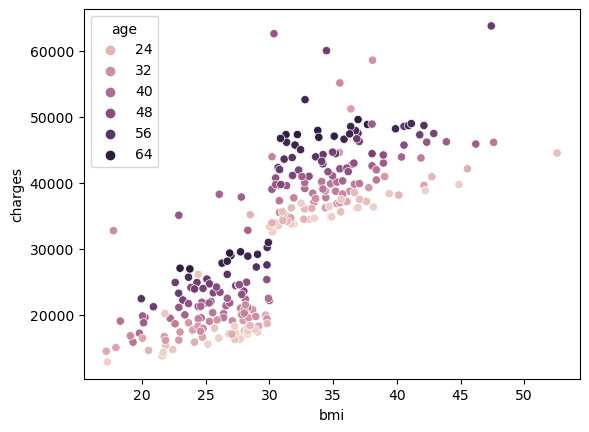

In [27]:
sns.scatterplot(data=smokers, x="bmi", y="charges", hue='age')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

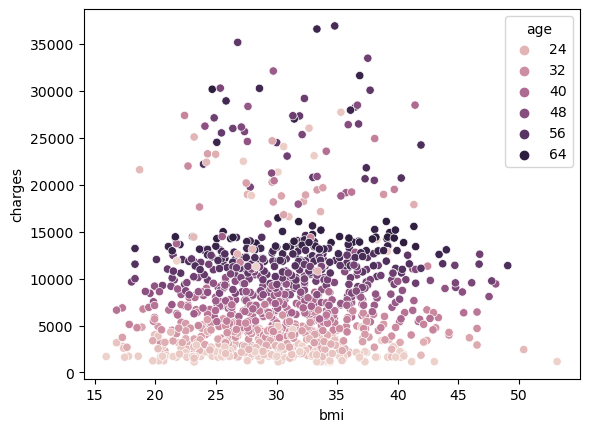

In [31]:
sns.scatterplot(data=nonsmokers, x="bmi", y="charges", hue='age')

In [29]:
nonsmokers.corr()

,age,bmi,children,charges
age,1.000000,0.122638,0.033395,0.627947
bmi,0.122638,1.000000,0.019208,0.084037
children,0.033395,0.019208,1.000000,0.138929
charges,0.627947,0.084037,0.138929,1.000000


In [32]:
def trainModel(trainDF, x, y):
    slopes = []
    for i in range(len(trainDF)):
        slope = (trainDF.iloc[i]['charges'] - y) / (trainDF.iloc[i]["bmi"] - x)
        slopes.append(slope)
    return sum(slopes)/len(slopes)

In [35]:
b = 10000
m = trainModel(smokers, 0, b)
print("y = "+str(m)+"x + "+ str(b))

y = 683.4843782174564x + 10000


In [36]:
def testModel(testDF, m, b): 
    checks = []
    for i in range(len(testDF)):
        predictedValue = (m*testDF.iloc[i]['bmi'] + b)
        actual = (testDF.iloc[i]['charges'])
        difference  = abs(predictedValue - actual)
        if difference <= 1000:
            checks.append(1)
        else:
            checks.append(0)
    return checks[checks == 1] / len(checks)

In [ ]:
testModel(smokers, m, b)